## Logistic Regression

In [35]:
import pandas as pd
import seaborn as sns

In [36]:
df = sns.load_dataset('iris')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
df = df[df['species'] != 'setosa']
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [39]:
x = df.drop('species', axis = 1)
y = df['species']

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.3 , random_state = 42)

In [41]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [42]:
params = {'penalty':['l1','l2','elasticnet'], 'C':[1,2,3,4,5,6,7,0,10,20,30,40,50,60,70,80,90], 'max_iter':[100,200,200]}

In [43]:
from sklearn.model_selection import GridSearchCV
logisCV = GridSearchCV(logistic, param_grid = params, scoring = 'accuracy', cv = 5)
logisCV.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
525 fits failed out of a total of 765.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  Fil

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 2, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [44]:
logisCV.best_params_

{'C': 40, 'max_iter': 100, 'penalty': 'l2'}

In [45]:
y_pred = logisCV.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score, classification_report

In [47]:
score = accuracy_score(y_pred, y_test)
print(score)

0.9333333333333333


In [48]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

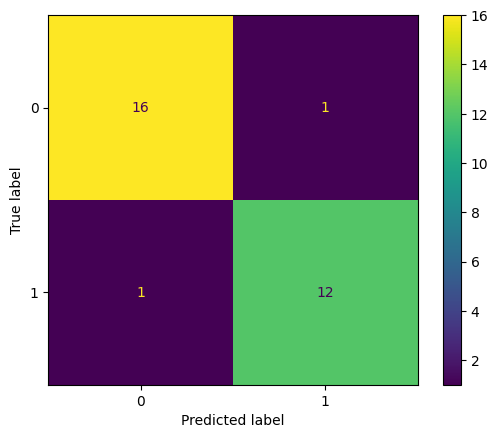

In [57]:
cm = confusion_matrix(y_pred, y_test)
dis = ConfusionMatrixDisplay(confusion_matrix = cm)
dis.plot()
